In [206]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

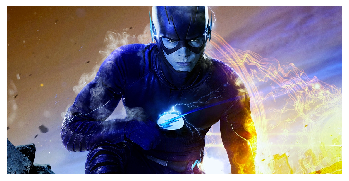

In [207]:
img=cv2.imread("Test1.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

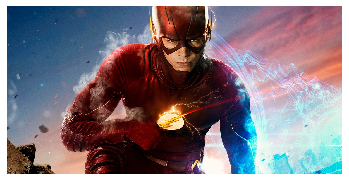

In [208]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [209]:
print(img.shape)

(600, 1200, 3)


In [210]:
#flatten each channel(r,g,b) of the image in linear array and make 2d array

all_pixels=img.reshape((img.shape[0]*img.shape[1],3))

In [211]:
print(all_pixels.shape)

(720000, 3)


In [212]:
from sklearn.cluster import KMeans

In [213]:
k=3 # no of dominant colors
km=KMeans(n_clusters=k)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [214]:
centers=km.cluster_centers_
print(centers)

[[101.53664623 105.51666054 129.56034199]
 [200.43210442 194.95695204 196.85817198]
 [ 53.37298977  17.95961327  19.37335841]]


In [215]:
centers=np.array(centers,dtype='uint8')
print(centers)

[[101 105 129]
 [200 194 196]
 [ 53  17  19]]


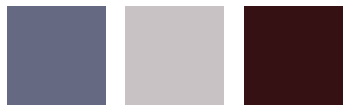

In [216]:
#plot colors for those values

i=1
colors=[]

for each_col in centers:
    plt.subplot(1,k,i) # because 4 colors
    plt.axis('off')
    i=i+1
    
    colors.append(each_col)
    
    #color swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

# Segmenting image

In [217]:
new_img=np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
new_img.shape

(720000, 3)

In [218]:
labels=km.labels_
print(len(labels))

720000


In [219]:
colors

[array([101, 105, 129], dtype=uint8),
 array([200, 194, 196], dtype=uint8),
 array([53, 17, 19], dtype=uint8)]

In [220]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[labels[i]]

In [221]:
print(new_img.shape)
new_img=new_img.reshape((img.shape))

(720000, 3)


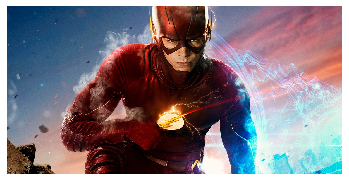

In [222]:
plt.imshow(img)
plt.axis('off')
plt.show()

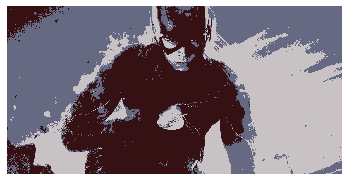

In [223]:
plt.imshow(new_img)
plt.axis('off')
plt.show()